#  Proyecto - Red neuronal feed forward / MLP

Elaborado por: Yurandir Santa María Santana Sandoval - Carné no. 18001546.

## Objetivo

La primera parte del proyecto consiste en una red neuronal tipo feedforward (multi-layer-perceptron), por lo que se ha escogido una base de datos del clima de Australia siendo el objetivo del análisis crear un modelo capaz de predecir si mañana lloverá.

## Librerías

In [12]:
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense

import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import plotly 
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

## Código

In [4]:
# Base de Datos

BBDD=pd.read_csv('BBDDWeather.csv', encoding='utf-8')

# Eliminación de valores nulos en el Target

BBDD=BBDD[pd.isnull(BBDD['RainTomorrow'])==False]

# Sustitucion de valores nulas en columnas diferentes al Target con el promedio

BBDD=BBDD.fillna(BBDD.mean())

# Categorización de la columna de Target

BBDD['RainTodayFlag']=BBDD['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
BBDD['RainTomorrowFlag']=BBDD['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

BBDD

C:\Users\yuran\AppData\Local\Temp\ipykernel_19588\36760108.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  BBDD=BBDD.fillna(BBDD.mean())


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTodayFlag,RainTomorrowFlag
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,...,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,No,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,...,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,No,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,...,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,No,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,...,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,No,0,0


### Matriz de Correlación

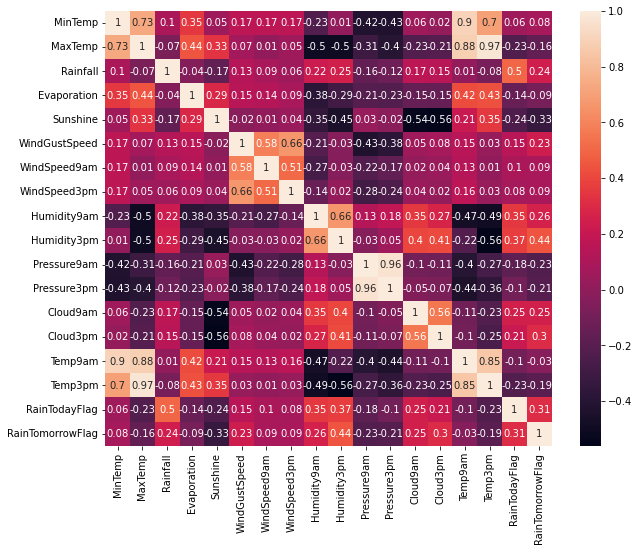

In [13]:
round(BBDD.corr(method="pearson"),2)

plt.figure(figsize=(10, 8))
sns.heatmap(round(BBDD.corr(method="pearson"),2), annot=True)
plt.show()

### Experimento 1 - 4 Capas de entrada y 2 Capas Ocultas

In [26]:
X=BBDD[['Humidity3pm','Cloud3pm','RainTodayFlag','Humidity9am']]
y=BBDD['RainTomorrowFlag'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Sequential(name="Model-with-Two-Inputs") # Model
model.add(Input(shape=(4,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(2, activation='softplus', name='Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['Accuracy', 'Precision', 'Recall'], 
              loss_weights=None,
              weighted_metrics=None, 
              run_eagerly=None, 
             )


model.fit(X_train, # input data
          y_train, # target data
          batch_size=10,
          epochs=10,
          validation_split=0.2,
          class_weight={0 : 0.3, 1 : 0.7},
          validation_steps=None,
          validation_freq=3,
         )

# Predict class labels on training data
pred_labels_tr = (model.predict(X_train) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (model.predict(X_test) > 0.5).astype(int)

print('-------------------------------------------------')

print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

Epoch 1/10
9101/9101 [==============================] - 8s 892us/step - loss: 0.2216 - accuracy: 0.0000e+00 - precision: 0.4585 - recall: 0.6071 5s - ETA: 0s - loss: 0.2231 - accuracy: 0.0000e+00 - precision: 0.4536 - r
Epoch 2/10
9101/9101 [==============================] - 8s 888us/step - loss: 0.2019 - accuracy: 0.0000e+00 - precision: 0.5145 - recall: 0.6220
Epoch 3/10
9101/9101 [==============================] - 10s 1ms/step - loss: 0.2002 - accuracy: 0.0000e+00 - precision: 0.5202 - recall: 0.6244 - val_loss: 0.4464 - val_accuracy: 0.0000e+00 - val_precision: 0.5429 - val_recall: 0.6068
Epoch 4/10
9101/9101 [==============================] - 9s 1ms/step - loss: 0.1997 - accuracy: 0.0000e+00 - precision: 0.5204 - recall: 0.6238A: 4s - loss: 0.1973 - accuracy: 0.0000e+00 - ETA: 2s - loss: 0.1985 - acc
Epoch 5/10
9101/9101 [==============================] - 8s 837us/step - loss: 0.1996 - accuracy: 0.0000e+00 - precision: 0.5220 - recall: 0.6245
Epoch 6/10
9101/9101 [================

### Experimento 2 - 4 Capas de entrada y 3 Capas Ocultas

In [27]:
X=BBDD[['Humidity3pm','Cloud3pm','RainTodayFlag','Humidity9am']]
y=BBDD['RainTomorrowFlag'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Sequential(name="Model-with-Two-Inputs") # Model
model.add(Input(shape=(4,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(3, activation='softplus', name='Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['Accuracy', 'Precision', 'Recall'], 
              loss_weights=None,
              weighted_metrics=None, 
              run_eagerly=None, 
             )


model.fit(X_train, # input data
          y_train, # target data
          batch_size=10,
          epochs=10,
          validation_split=0.2,
          class_weight={0 : 0.3, 1 : 0.7},
          validation_steps=None,
          validation_freq=3,
         )

# Predict class labels on training data
pred_labels_tr = (model.predict(X_train) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (model.predict(X_test) > 0.5).astype(int)

print('-------------------------------------------------')

print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

Epoch 1/10
9101/9101 [==============================] - 9s 944us/step - loss: 0.6778 - accuracy: 0.0034 - precision: 0.3674 - recall: 0.3339
Epoch 2/10
9101/9101 [==============================] - 9s 1ms/step - loss: 0.2170 - accuracy: 0.0000e+00 - precision: 0.4646 - recall: 0.6456A: 0s - loss: 0.2171 - accuracy: 0.0000e+00 - precision: 0.4645 - recall: 
Epoch 3/10
9101/9101 [==============================] - 13s 1ms/step - loss: 0.2106 - accuracy: 0.0000e+00 - precision: 0.4761 - recall: 0.6553 - val_loss: 0.4657 - val_accuracy: 0.0000e+00 - val_precision: 0.4997 - val_recall: 0.6538
Epoch 4/10
9101/9101 [==============================] - 10s 1ms/step - loss: 0.2074 - accuracy: 0.0000e+00 - precision: 0.4829 - recall: 0.6589: 4s - loss: 0.2073 - accuracy: - ETA: 1s - loss: 0.2073 - accuracy: 0.0000e+00 - p
Epoch 5/10
9101/9101 [==============================] - 9s 1ms/step - loss: 0.2058 - accuracy: 0.0000e+00 - precision: 0.4864 - recall: 0.6597A: 7s - loss: 0.2069 - accuracy: 0.000

### Experimento 3 - 3 Capas de entrada y 2 Capas Ocultas

In [28]:
X=BBDD[['Humidity3pm','Cloud3pm','RainTodayFlag']]
y=BBDD['RainTomorrowFlag'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Sequential(name="Model-with-Two-Inputs") # Model
model.add(Input(shape=(3,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(2, activation='softplus', name='Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['Accuracy', 'Precision', 'Recall'], 
              loss_weights=None,
              weighted_metrics=None, 
              run_eagerly=None, 
             )


model.fit(X_train, # input data
          y_train, # target data
          batch_size=10,
          epochs=10,
          validation_split=0.2,
          class_weight={0 : 0.3, 1 : 0.7},
          validation_steps=None,
          validation_freq=3,
         )

# Predict class labels on training data
pred_labels_tr = (model.predict(X_train) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (model.predict(X_test) > 0.5).astype(int)

print('-------------------------------------------------')

print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

Epoch 1/10
9101/9101 [==============================] - 7s 748us/step - loss: 0.2458 - accuracy: 0.0000e+00 - precision: 0.4515 - recall: 0.6465
Epoch 2/10
9101/9101 [==============================] - 7s 752us/step - loss: 0.2009 - accuracy: 0.0000e+00 - precision: 0.5216 - recall: 0.6219
Epoch 3/10
9101/9101 [==============================] - 9s 935us/step - loss: 0.1996 - accuracy: 0.0000e+00 - precision: 0.5242 - recall: 0.6228 - val_loss: 0.4658 - val_accuracy: 0.0000e+00 - val_precision: 0.5077 - val_recall: 0.6518
Epoch 4/10
9101/9101 [==============================] - 7s 807us/step - loss: 0.1995 - accuracy: 0.0000e+00 - precision: 0.5216 - recall: 0.6226
Epoch 5/10
9101/9101 [==============================] - 7s 753us/step - loss: 0.1995 - accuracy: 0.0000e+00 - precision: 0.5215 - recall: 0.6204
Epoch 6/10
9101/9101 [==============================] - 8s 902us/step - loss: 0.1995 - accuracy: 0.0000e+00 - precision: 0.5211 - recall: 0.6226 - val_loss: 0.4495 - val_accuracy: 0.00

## Análisis y Conclusiones

El rendimiendo del modelo obtenido a través de la experimentación permite determinar que debido a la arquitectura del modelo se pude capturar mejor las no linealidades presentes en la base de datos.

La base de datos presenta complejidades importantes que en otros métodos comúnes de regresión perjudicarían al rendimiento de este, como la poca relación entre las variables y el objetivo. 

Finalmente, los resultados en los tres experimentos resultados fueron sobresalientes. Utilizando la evaluación con el dataset de Test se obtuvieron resultados de Precision, Recall y F1-Score por arriba de 85 en la mayoría de los experimentos.